The slope and intercept of hypothesis function(regression line) for minimum value of MSE (w0,w1) are (3.6884323271454504, 0.6407003842527113) respectively.


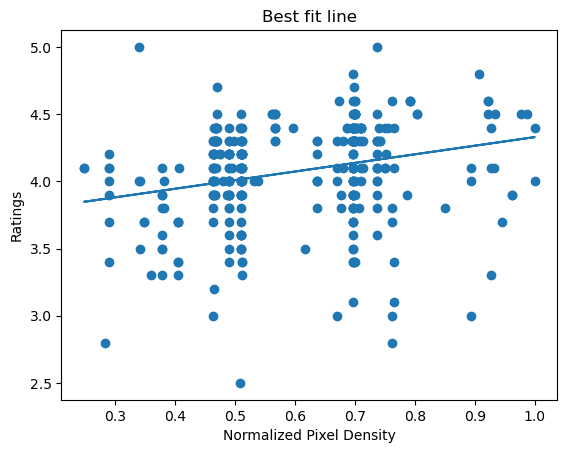

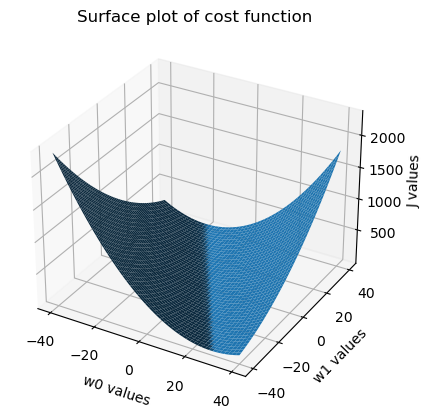

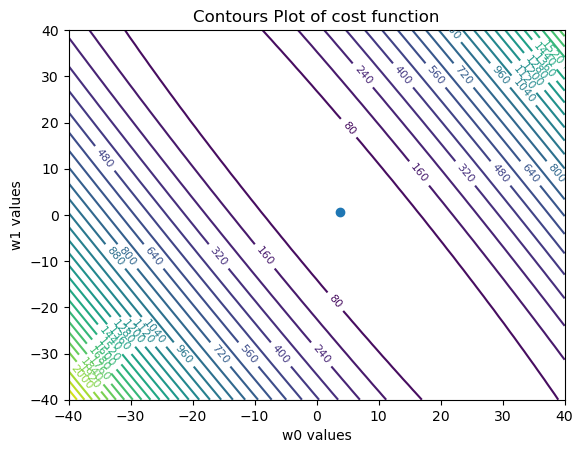

The minimum value of cost function thus obtained is 0.06770793351176325 
The mean_squared_error thus obtained is 0.1354158670235265


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
df = pd.read_csv("mobile_data (1).csv")
x = np.array(df["Pixel Density"]/max(df["Pixel Density"]))
y = np.array(df["Rating"])
pl.scatter(x,y)    

def J(w0,w1):
    h = w0 + w1*x #Hypothesis function
    m = len(x)
    sum = 0
    for i in range(m):
        sum = sum+(h[i]-y[i])**2
    J = sum/(2*m)
    return J
def gradJ(w0,w1):
    h = w0 + w1*x #Hypothesis function
    m = len(x)
    sum1 = 0
    for i in range(m):
        sum1 = sum1+(h[i] - y[i])
    J1 = sum1/m
    sum2 = 0
    for i in range(m):
        sum2 = sum2+(h[i] - y[i])*x[i]
    J2 = sum2/m
    grad_J = np.array([J1,J2])
    return grad_J
class unidirection_search():#line search
    def __init__(self,w_s,s):
        self.w_s = w_s
        self.s = s
    def u_s(self,a):
        w1 = self.w_s[0] + a*self.s[0]
        w2 = self.w_s[1] + a*self.s[1]
        j1 = J(w1,w2)
        return j1
    def critical(self,a,b,n):
        self.delta  = (b-a)/n
        self.a1 = a
        self.a2 = self.a1+self.delta
        self.a3 = self.a2+self.delta
        while self.a3<=b:
            if self.u_s(self.a1)>=self.u_s(self.a2)<=self.u_s(self.a3):
                self.tup1 = (self.a1,self.a3)
                return self.tup1
            else:
                self.a1 = self.a2
                self.a2 = self.a3
                self.a3 = self.a3 + self.delta
        self.tup = 0 
        self.tup1 = b
   
    def interval_halving(self,a,b):
        self.E = 0.000001
        self.a = a
        self.b = b
        self.L = self.b-self.a
        self.a_m = (self.a+self.b)/2
        while abs(self.L)>=self.E:
            self.Ja = self.u_s(self.a_m)
            self.a1 = self.a+self.L/4
            self.a2 = self.b-self.L/4
            self.Ja1 = self.u_s(self.a1)
            self.Ja2 = self.u_s(self.a2)
            if self.Ja1 < self.Ja:
                self.b = self.a_m
                self.a_m = self.a1
            elif self.Ja2 < self.Ja:
                self.a = self.a_m
                self.a_m = self.a2
            else:
                self.b = self.a2
                self.a = self.a1
                self.a_m = (self.a+self.b)/2
            self.L = self.b-self.a
        self.tup_3 = (self.a,self.b)
        return (self.tup_3[0]+self.tup_3[1])/2
class steepest_gradient():#steepest gradient descent
    def __init__(self,w_s,E1,E2):#w_s is the starting point and s is the direction vector (in this case it will be -grad(J))
        self.w_s = w_s
        self.E1 = E1
        self.E2 = E2
    def grad_des(self,a,b,n):#gradient descent procedure
        
        c = unidirection_search(self.w_s,-1*gradJ(self.w_s[0],self.w_s[1]))#Finding correct alpha using linear search
        self.a = c.interval_halving(a,b) 
        self.w_1 = self.w_s[0]  + self.a*(-gradJ(self.w_s[0],self.w_s[1])[0])
        self.w_2 = self.w_s[1]  + self.a*(-gradJ(self.w_s[0],self.w_s[1])[1])
        self.array = (self.w_1,self.w_2)
        self.grad_1 = gradJ(self.w_1,self.w_2)
        self.J1 = J(self.w_1,self.w_2)
        self.k = 0
        while np.linalg.norm(self.grad_1) > self.E1 and self.k<=1000 :#stopping criteria
            c = unidirection_search(self.array,-1*self.grad_1)
            self.a = c.interval_halving(a,b) 
            self.w__1 = self.w_1 + self.a*(-gradJ(self.w_1,self.w_2)[0])
            self.w__2 = self.w_2 + self.a*(-gradJ(self.w_1,self.w_2)[1])
            if abs(np.dot(gradJ(self.w_1,self.w_2),gradJ(self.w__1,self.w__2))) < self.E2:#stopping criteria
                  break
            self.w_1 = self.w__1
            self.w_2 = self.w__2
            self.grad_1 = gradJ(self.w_1,self.w_2)
            self.J1 = J(self.w_1,self.w_2)
            self.k += 1
        self.array = np.array([self.w_1,self.w_2])
        return self.array
     
    def minimum(self):
        min_J = J(self.w_1,self.w_2) 
        return min_J

w_s = np.array([0,-1.6])
a = 0
b = 100 #put b>=1 to get the perfect value of 0 as minimum
E1 = 0.0000001
E2 = 0.0000001
n = 100
c1 = steepest_gradient(w_s,E1,E2)
w = tuple(c1.grad_des(a,b,n))
print(f"The slope and intercept of hypothesis function(regression line) for minimum value of MSE (w0,w1) are {w} respectively.") 
h = w[0]+w[1]*x
pl.plot(x,h)
pl.title("Best fit line")
pl.xlabel("Normalized Pixel Density")
pl.ylabel("Ratings")
pl.show()
X = np.linspace(-40,40)
Y = np.linspace(-40,40)
X1,Y1 = np.meshgrid(X,Y)
Z1 = np.array([[J(X1[i][j],Y1[i][j]) for j in range(len(X))] for i in range(len(Y))])
Z = np.array(Z1)
fig = pl.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.plot_surface(X1,Y1,Z)
ax.set_title("Surface plot of cost function")
ax.set_xlabel('w0 values')
ax.set_ylabel('w1 values')
ax.set_zlabel('J values')
pl.show()
fig,ax=pl.subplots(1,1)
cp  = pl.contour(X1, Y1, Z,levels = 30)
pl.clabel(cp, fontsize=8)
ax.set_title('Contours Plot of cost function')
ax.set_xlabel('w0 values')
ax.set_ylabel('w1 values')
pl.scatter(w[0],w[1])
pl.show()
J_min = c1.minimum()
print(f"The minimum value of cost function thus obtained is {J_min} ")
print(f"The mean_squared_error thus obtained is {2*J_min}")

# The shown point is the point of minimum value of cost function

